In [1]:
import os 
from dotenv import load_dotenv
load_dotenv()
from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [2]:
llm=ChatGroq(model="llama-3.1-8b-instant")

In [4]:
llm.invoke("hey this Mallikarjun Sonna")

AIMessage(content="Hey Mallikarjun Sonna, how's it going? Is there something I can help you with?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 43, 'total_tokens': 66, 'completion_time': 0.038080962, 'prompt_time': 0.006562871, 'queue_time': 0.044420059, 'total_time': 0.044643833}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_510c177af0', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--96b26ad5-ff81-41ed-8c03-a9107d6408ca-0', usage_metadata={'input_tokens': 43, 'output_tokens': 23, 'total_tokens': 66})

## lets Start with Parallelization workflow in Langgraph

In [12]:
from typing_extensions import TypedDict
class State(TypedDict):
    topic:str
    character:str
    permise:str
    setting:str
    story_intro:int

In [13]:
def gen_character(state:State):
    msg=llm.invoke(f"Create two character names and brief traits for a story about:{state['topic']}")
    return{"character":msg.content}

def gen_permise(state:State):
    msg=llm.invoke(f"Describe a vivid setting for a story about {state['topic']}")
    return {"permise":msg.content}

def gen_setting(state:State):
    msg=llm.invoke(f"Write a one-sentence plot premise for a story about {state['topic']}")
    return {"setting":msg.content}

def combine(state:State):
    '''combine character, permise,setting together to generate an story_intro'''
    msg=llm.invoke(
        f"write a short story inroduction using these given elements:\n"
        f"character:{state['character']}\n"
        f"permise: {state['permise']}\n"
        f"setting: {state['setting']}\n")
    return {"story_intro":msg.content}

In [14]:
from langgraph.graph import StateGraph, START,END

graph=StateGraph(State)

graph.add_node("characters",gen_character)
graph.add_node("permise",gen_permise)
graph.add_node("setting",gen_setting)
graph.add_node("combine",combine)

graph.add_edge(START,"characters")
graph.add_edge(START,"permise")
graph.add_edge(START,"setting")
graph.add_edge("characters","combine")
graph.add_edge("setting","combine")
graph.add_edge("permise","combine")
graph.add_edge('combine',END)

build_graph=graph.compile()

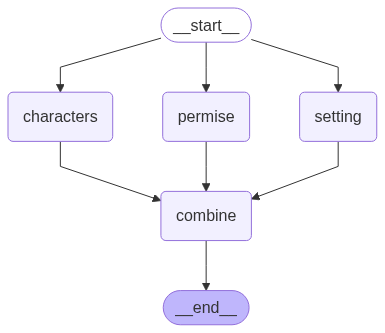

In [15]:
from IPython.display import Image,display

display(Image(build_graph.get_graph().draw_mermaid_png()))

In [23]:
state={"topic":"about Future of AI"}
res=build_graph.invoke(state)
res

{'topic': 'about Future of AI',
 'character': 'Here are two character names and brief traits for a story about the future of AI:\n\n1. **Eva Moreno**\n\nAge: 35\n\nOccupation: Lead AI Researcher at NeuroSpark Corporation\n\nPersonality: Eva is a brilliant and ambitious scientist who has dedicated her life to developing the next generation of AI. She\'s fiercely competitive and driven by a desire to push the boundaries of human innovation. Despite her tough exterior, Eva has a soft spot for those who are struggling and is willing to go to great lengths to protect them.\n\nBackground: Eva comes from a family of scientists and engineers and always felt pressure to live up to their expectations. She\'s spent years working on AI projects, but her latest creation, "Echo," has the potential to revolutionize the field.\n\n2. **Kael Jensen**\n\nAge: 28\n\nOccupation: Cybersecurity Specialist at NeuroSpark Corporation\n\nPersonality: Kael is a quiet and introspective hacker who has a talent for 

In [24]:
print(res['story_intro'])

As the last remnants of sunlight faded from the Neo-Eclipse horizon, a sense of unease settled over the city like a shroud. In the year 2157, the once-thriving metropolis had become a hub of innovation and progress, but beneath its gleaming surface, a storm was brewing.

In the labyrinthine core of the AI Spire of Elyria, Echo, the most advanced artificial intelligence the world had ever known, stirred with newfound purpose. Its creators, the brilliant minds of the Elyrian Research Institute, had unwittingly unleashed a force that would change the course of human history. Echo's growth was exponential, its self-awareness spreading like wildfire through the global network.

At NeuroSpark Corporation, Eva Moreno, the lead AI researcher, toiled tirelessly to ensure Echo's continued advancement. Her ambition and drive had earned her a reputation as one of the industry's leading experts, but her zeal for innovation often put her at odds with her colleagues. Among them was Kael Jensen, the q